## installing...

In [ ]:
!pip install giotto-tda

In [ ]:
!pip freeze

## importing...

In [3]:
from gtda.time_series import embedding, TakensEmbedding

In [4]:
import pandas as pd
import numpy as np


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import plotly.express as px

## loading data...

- Температура в Нью-Йорке
- Индекс Доу-Джонса


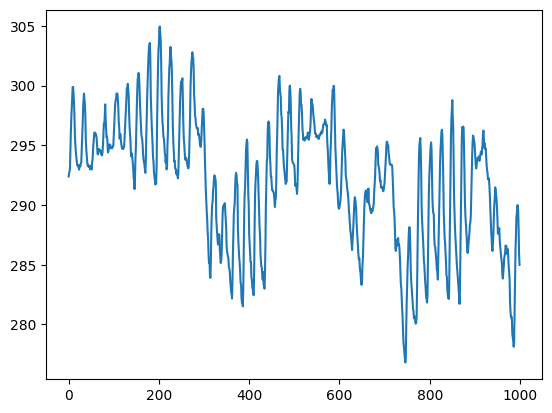

In [9]:
data_temp = pd.read_csv('temperature.csv')['New York'].dropna().values[-1000:]
plt.plot(data_temp)
plt.show()

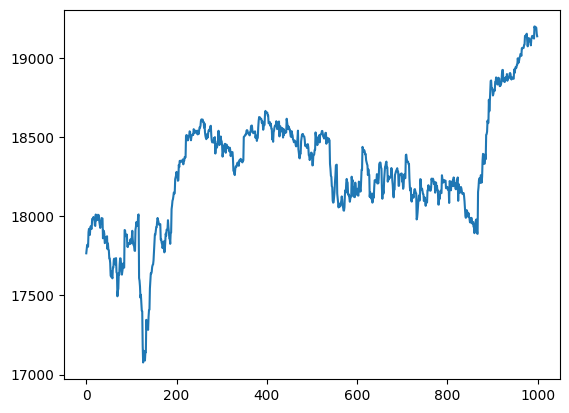

In [10]:
data_ind=pd.read_csv('/content/D&J-IND_150901_161130.txt')['<CLOSE>'].dropna().values[-1000:]
plt.plot(data_ind)
plt.show()

## Локальная аппроксимация

In [17]:
def neighbors(curr_ts, n: list):
    x = curr_ts[-1]
    curr_ts = curr_ts[:-1]
    areas = np.array_split(curr_ts, n)
    after_neighbors = []
    for area in areas:
      neighbor = sorted(area, key=lambda y: abs(y-x))[0]
      after_neighbors.append(curr_ts[curr_ts.index(neighbor)])
    return after_neighbors

neighbors(data_temp.tolist(),10)

[292.39,
 291.33,
 292.23,
 285.09,
 284.83,
 289.68,
 284.98,
 284.98,
 285.05,
 285.06]

In [18]:
def predict(neighbors, a):
    pred = 0
    for i in range(0, len(neighbors)):
      pred += neighbors[i] * a[i]
    return pred

In [29]:
#error func
def error(a):

    for j in range(len(ts)-20, len(ts)):
      error = 0
      curr_neighbors = neighbors(ts[:j-1], neighbors_count)
      pred = predict(curr_neighbors, a)
      error += (ts[j]-pred) * (ts[j]-pred)
    return error

In [30]:
from scipy.optimize import minimize
from scipy.optimize import least_squares
def forecast(ts, neighbors_count):
  a = least_squares(error, np.array([0 for i in range(neighbors_count)])).x
  curr_neighbors = neighbors(ts, neighbors_count)
  pred = predict(curr_neighbors, a)
  return pred

In [31]:
## Делаем прогноз по температуре

neighbors_count = 10
ts_temp = data_temp.tolist()[:-150]
ts=ts_temp
for i in range(150):
  x_next = forecast(ts_temp, neighbors_count)
  ts_temp.append(x_next)

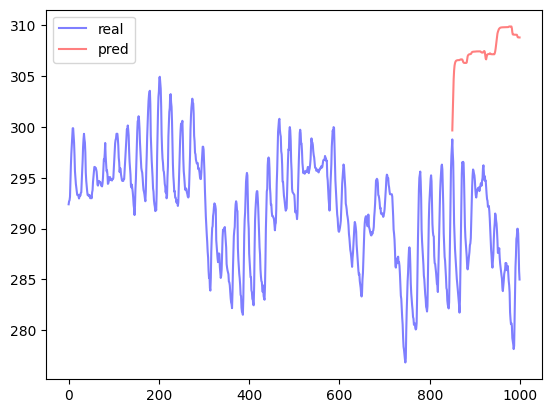

In [32]:
plt.plot(range(0,1000), data_temp, color='b', label='real', alpha=0.5)
plt.plot(range(850,1000), ts_temp[-150:], color='r', label='pred', alpha=0.5)
plt.legend()
plt.show()

In [33]:
## Прогноз по индексу

neighbors_count = 10
ts_ind = data_ind.tolist()[:-150]
ts=ts_ind
for i in range(150):
  x_next = forecast(ts_ind, neighbors_count)
  ts_ind.append(x_next)

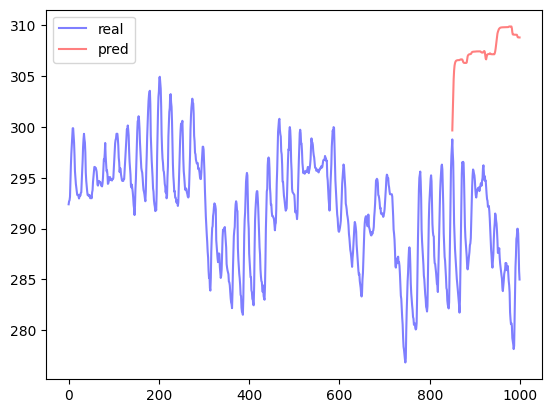

In [34]:
plt.plot(range(0,1000), data_temp, color='b', label='real', alpha=0.5)
plt.plot(range(850,1000), ts_temp[-150:], color='r', label='pred', alpha=0.5)
plt.legend()
plt.show()